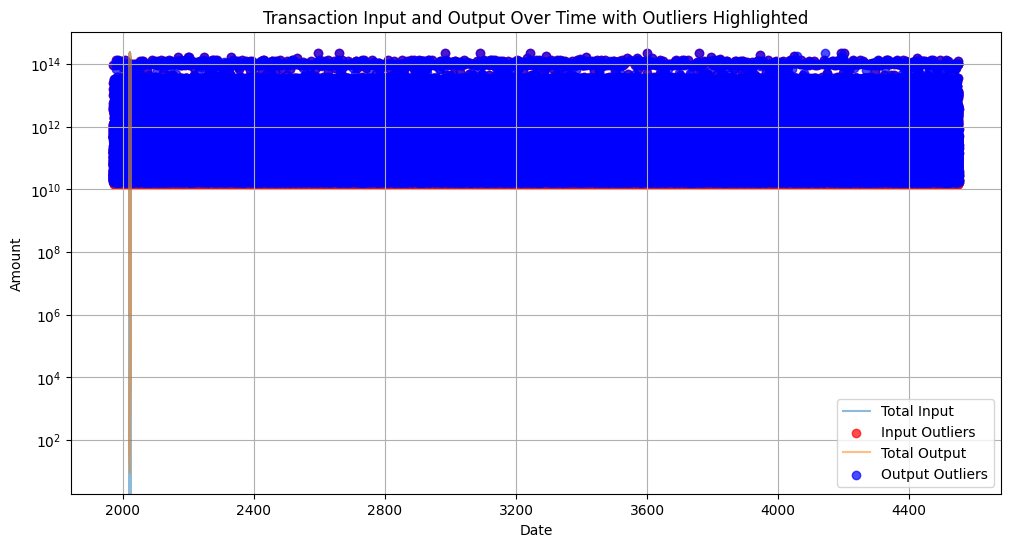

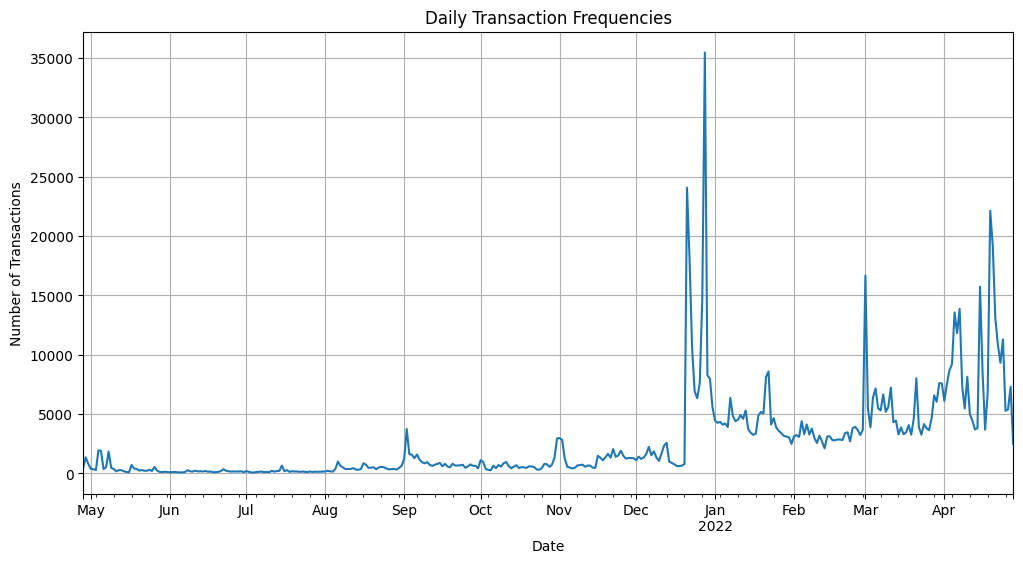

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('iotaDB.db')
cursor = conn.cursor()

# Query the database for transaction amounts and timestamps
query = """
SELECT timestamp, input_amounts_x, output_amounts_y FROM Transactions
"""
cursor.execute(query)
data = cursor.fetchall()

# Close the database connection
conn.close()

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Input Amounts', 'Output Amounts'])

# Convert and parse columns
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Input Amounts'] = df['Input Amounts'].apply(eval)
df['Output Amounts'] = df['Output Amounts'].apply(eval)

# Aggregate input and output amounts
df['Total Input'] = df['Input Amounts'].apply(sum)
df['Total Output'] = df['Output Amounts'].apply(sum)

# Function to detect outliers using IQR
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Detect outliers in both inputs and outputs
input_outliers = detect_outliers(df['Total Input'])
output_outliers = detect_outliers(df['Total Output'])

# Plotting transaction amounts over time with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Total Input'], label='Total Input', alpha=0.5)
plt.scatter(input_outliers.index, input_outliers.values, color='red', label='Input Outliers', alpha=0.7)
plt.plot(df['Timestamp'], df['Total Output'], label='Total Output', alpha=0.5)
plt.scatter(output_outliers.index, output_outliers.values, color='blue', label='Output Outliers', alpha=0.7)
plt.title('Transaction Input and Output Over Time with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.yscale('log')  # Use logarithmic scale for better visibility
plt.legend()
plt.grid(True)
plt.show()


